In [1]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import graphviz

In [2]:
usData = pd.read_csv('../Data/Youtube/cleaned_us.csv')
usData.head(1)

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13T17:13:01.000Z,shantell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs


In [3]:
usData['trending'] = pd.qcut(usData.views,q=2,labels=['Not Trending','Trending'])
usData.head(1)

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,trending
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13T17:13:01.000Z,shantell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,Trending


In [4]:
attributes = usData.drop(['channel_title','views','likes','dislikes','comment_count','trending','video_id','thumbnail_link','trending_date','publish_time','description'],axis=1)

In [5]:
attributes.title = [len(title.split()) for title in attributes.title]

In [6]:
attributes.tags = [len(tag.split()) for tag in attributes.tags]

In [7]:
attributes = pd.get_dummies(attributes)

In [8]:
attributes.head(4)

,title,tags,comments_disabled,ratings_disabled,video_error_or_removed,category_Autos & Vehicles,category_Comedy,category_Education,category_Entertainment,category_Film & Animation,...,category_Howto & Style,category_Music,category_News & Politics,category_Nonprofits & Activism,category_People & Blogs,category_Pets & Animals,category_Science & Technology,category_Shows,category_Sports,category_Travel & Events
0,7,2,False,False,False,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,3,1,False,False,False,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,13,24,False,False,False,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,10,1,False,False,False,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [9]:
target = usData.trending
target.head(2)

0        Trending
1    Not Trending
Name: trending, dtype: category
Categories (2, object): [Not Trending < Trending]

In [10]:
target.value_counts()

Not Trending    20451
Trending        20450
Name: trending, dtype: int64

In [11]:
# attributes.trending_date = pd.to_datetime(attributes.trending_date, format='%y.%d.%m')

In [12]:
# count_vect = CountVectorizer()
# attributes_vectorized = count_vect.fit_transform(attributes)
# attributes_vectorized.shape

In [13]:
# tfidf_transformer = TfidfTransformer()

In [14]:
# attributes_tfidf = tfidf_transformer.fit_transform(attributes)
# attributes_tfidf.shape

In [15]:
NBayes = MultinomialNB()

In [16]:
parameters={'alpha':[0,1,2,3,4,5,6,7,8,9]}

In [17]:
NBayesCV = GridSearchCV(NBayes, param_grid=parameters)

In [18]:
NBayesCV.fit(attributes,target)

C:\Users\alawamhm\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\alawamhm\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\alawamhm\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\alawamhm\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [19]:
NBayesCV.best_params_

{'alpha': 8}

In [20]:
NBayesCV.best_score_

0.5439231314637784

In [21]:
error_rate = 1 - NBayesCV.best_score_
print('Naive Bayes error rate is ', error_rate.round(2))

Naive Bayes error rate is  0.46


In [22]:
Tree = tree.DecisionTreeClassifier()

In [23]:
parameters = {'max_depth':[1,2,3,4,5,6,7,8,9,10]} # define a dictionary

In [24]:
TreeCV = GridSearchCV(Tree,param_grid=parameters,return_train_score=True) # cross validation

In [25]:
TreeCV.fit(attributes,target)

C:\Users\alawamhm\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [26]:
TreeCV.best_params_

{'max_depth': 7}

In [27]:
TreeCV.best_score_

0.5364661010733234

In [28]:
error_rate = 1 - TreeCV.best_score_
print('Decision Tree classifaier error rate is ', error_rate.round(2))

Decision Tree classifier error rate is  0.46


In [29]:
# construct decision tree
Tree = tree.DecisionTreeClassifier(max_depth=7)

In [30]:
Tree.fit(attributes,target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

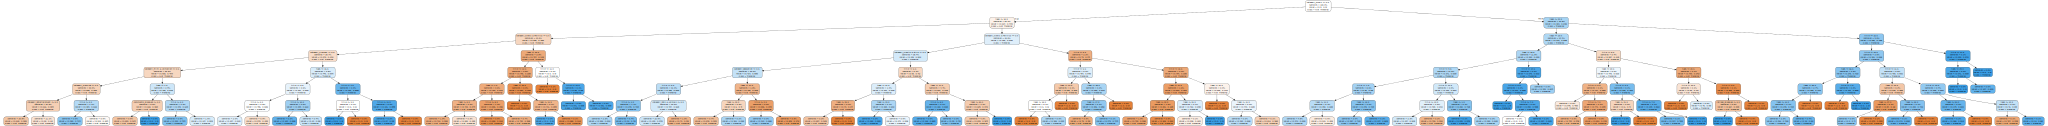

In [31]:
dot_data = tree.export_graphviz(Tree,
                               out_file=None,
                               feature_names=attributes.columns,
                               class_names=['Not Trending','Trending'],
                               proportion=True,
                               impurity=False,
                               filled=True,
                               rounded=True)
graph = graphviz.Source(dot_data)
graph.render('TrendingDecisionTree')
graph

In [32]:
labels = target.cat.categories

In [33]:
NBayes = MultinomialNB(alpha=8)
NBayes.fit(attributes,target)

MultinomialNB(alpha=8, class_prior=None, fit_prior=True)

In [34]:
predictB = NBayes.predict(attributes)
confMatB = confusion_matrix(target,predictB)
confMatB = pd.DataFrame(confMatB,index=labels,columns=labels)
confMatB['Totals'] = confMatB.sum(axis=1)
confMatB

,Not Trending,Trending,Totals
Not Trending,12838,7613,20451
Trending,9363,11087,20450


In [35]:
predictT = Tree.predict(attributes)
confMatT = confusion_matrix(target,predictT)
confMatT = pd.DataFrame(confMatT,index=labels,columns=labels)
confMatT['Totals'] = confMatT.sum(axis=1)
confMatT

,Not Trending,Trending,Totals
Not Trending,12646,7805,20451
Trending,6939,13511,20450


In [4]:
usData.head(1)

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,trending
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13T17:13:01.000Z,shantell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,Trending


In [28]:
titles = usData[usData.trending == 'Trending'].channel_title.value_counts().reset_index(name='count').query("count == 1")['index']
titlesDf = usData[usData.channel_title=='truTV']
tempDf = usData[usData.channel_title=='Miranda Sings']
titlesDf.append(tempDf)
# for title in titles:
#     if(title != 'truTV'):
#         titlesDf.append(usData[usData.channel_title==title])
titlesDf

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,trending
4041,WG8JK-cPu-g,17.01.12,At Home with Amy Sedaris - Amy's Not-So Holida...,truTV,2017-11-27T20:30:03.000Z,"trutv,tru,funny because its tru,trutv trutv co...",3597,59,8,13,https://i.ytimg.com/vi/WG8JK-cPu-g/default.jpg,False,False,False,Chassie Tucker and Amy have very different ide...,Entertainment,Not Trending
4395,Yxv5EY-JwmU,17.08.12,At Home with Amy Sedaris - Astronaut Relations...,truTV,2017-12-04T19:22:14.000Z,"trutv,tru,funny because its tru,trutv trutv co...",4232,49,4,4,https://i.ytimg.com/vi/Yxv5EY-JwmU/default.jpg,False,False,False,Why did the astronaut leave his wife? One sexu...,Entertainment,Not Trending
8902,DxSf6Nb_I7o,18.19.03,Adam Ruins Everything - The Truth about Paul R...,truTV,2018-03-15T01:00:11.000Z,"“trutv,shows”,”trutv,new,series”,“trutv,episod...",148322,2545,113,225,https://i.ytimg.com/vi/DxSf6Nb_I7o/default.jpg,False,False,False,Adam sets the record straight on what actually...,Entertainment,Not Trending
8960,DxSf6Nb_I7o,18.20.03,Adam Ruins Everything - The Truth about Paul R...,truTV,2018-03-15T01:00:11.000Z,"“trutv,shows”,”trutv,new,series”,“trutv,episod...",178787,2926,129,266,https://i.ytimg.com/vi/DxSf6Nb_I7o/default.jpg,False,False,False,Adam sets the record straight on what actually...,Entertainment,Not Trending
9021,DxSf6Nb_I7o,18.21.03,Adam Ruins Everything - The Truth about Paul R...,truTV,2018-03-15T01:00:11.000Z,"“trutv,shows”,”trutv,new,series”,“trutv,episod...",204243,3243,144,303,https://i.ytimg.com/vi/DxSf6Nb_I7o/default.jpg,False,False,False,Adam sets the record straight on what actually...,Entertainment,Not Trending
9077,DxSf6Nb_I7o,18.22.03,Adam Ruins Everything - The Truth about Paul R...,truTV,2018-03-15T01:00:11.000Z,"“trutv,shows”,”trutv,new,series”,“trutv,episod...",220927,3422,151,314,https://i.ytimg.com/vi/DxSf6Nb_I7o/default.jpg,False,False,False,Adam sets the record straight on what actually...,Entertainment,Not Trending
9134,DxSf6Nb_I7o,18.23.03,Adam Ruins Everything - The Truth about Paul R...,truTV,2018-03-15T01:00:11.000Z,"“trutv,shows”,”trutv,new,series”,“trutv,episod...",234832,3561,154,324,https://i.ytimg.com/vi/DxSf6Nb_I7o/default.jpg,False,False,False,Adam sets the record straight on what actually...,Entertainment,Not Trending
9191,DxSf6Nb_I7o,18.24.03,Adam Ruins Everything - The Truth about Paul R...,truTV,2018-03-15T01:00:11.000Z,"“trutv,shows”,”trutv,new,series”,“trutv,episod...",247827,3692,157,336,https://i.ytimg.com/vi/DxSf6Nb_I7o/default.jpg,False,False,False,Adam sets the record straight on what actually...,Entertainment,Not Trending
9253,DxSf6Nb_I7o,18.25.03,Adam Ruins Everything - The Truth about Paul R...,truTV,2018-03-15T01:00:11.000Z,"“trutv,shows”,”trutv,new,series”,“trutv,episod...",260816,3808,158,351,https://i.ytimg.com/vi/DxSf6Nb_I7o/default.jpg,False,False,False,Adam sets the record straight on what actually...,Entertainment,Not Trending
9316,DxSf6Nb_I7o,18.26.03,Adam Ruins Everything - The Truth about Paul R...,truTV,2018-03-15T01:00:11.000Z,"“trutv,shows”,”trutv,new,series”,“trutv,episod...",270494,3882,161,352,https://i.ytimg.com/vi/DxSf6Nb_I7o/default.jpg,False,False,False,Adam sets the record straight on what actually...,Entertainment,Not Trending


In [44]:
titles.sort_values()

963              Check It Out
964                 Chubbyemu
982                  Dale Dai
953                 DonDiablo
956         EntertainmentVevo
958          Funny New Videos
986                   Gallant
979                GingerPale
960                   HouzzTV
977     It's Okay To Be Smart
970                Jack Coyne
972                       KFC
971             Lane Anderson
952            Maddie Ziegler
951                  Manifest
968           MariahCareyVEVO
980                Max Joseph
957              Mercury News
949             Miranda Sings
955                     Ozuna
962                 PetaPixel
950                PolyMatter
961                     R3HAB
978                   RiceGum
985                      Rise
959                    SaggyJ
976                  Shyrynne
975                   Spotify
969               StorrorBlog
954              Super Netvid
981                 TMZSports
983    That Japanese Man Yuta
965        The School of Life
989       

In [32]:
usData[usData.channel_title.isin(titles)]

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,trending
1041,2pJlpCfueV0,18.19.01,Kid orders bong. Package arrives and his mom w...,Dale Dai,2018-01-18T00:13:44.000Z,"bong,mum freakout,mom freakout,frick,mom finds...",1392244,17274,545,3076,https://i.ytimg.com/vi/2pJlpCfueV0/default.jpg,False,False,False,Kid orders bong. Package arrives and his mom w...,People & Blogs,Trending
1123,26qOMpjicGs,18.25.01,When you and your mates go snow boarding for t...,Funny New Videos,2018-01-22T00:08:49.000Z,[none],603894,5037,184,364,https://i.ytimg.com/vi/26qOMpjicGs/default.jpg,False,False,False,Lol - Subscribe to my new channel that will co...,People & Blogs,Not Trending
1143,26qOMpjicGs,18.26.01,When you and your mates go snow boarding for t...,Funny New Videos,2018-01-22T00:08:49.000Z,[none],644325,5145,194,368,https://i.ytimg.com/vi/26qOMpjicGs/default.jpg,False,False,False,Lol - Subscribe to my new channel that will co...,People & Blogs,Not Trending
1163,26qOMpjicGs,18.27.01,When you and your mates go snow boarding for t...,Funny New Videos,2018-01-22T00:08:49.000Z,[none],663095,5217,195,369,https://i.ytimg.com/vi/26qOMpjicGs/default.jpg,False,False,False,Lol - Subscribe to my new channel that will co...,People & Blogs,Not Trending
1182,26qOMpjicGs,18.28.01,When you and your mates go snow boarding for t...,Funny New Videos,2018-01-22T00:08:49.000Z,[none],683434,5413,201,375,https://i.ytimg.com/vi/26qOMpjicGs/default.jpg,False,False,False,Lol - Subscribe to my new channel that will co...,People & Blogs,Trending
1199,ytsZFYMGl0w,18.30.01,childish gambino grammy awards performance 2018,Shyrynne,2018-01-29T01:44:05.000Z,"childish gambino,jd mccrary,grammy's,terrified",1035381,25233,598,2412,https://i.ytimg.com/vi/ytsZFYMGl0w/default.jpg,False,False,False,"Childish Gambino performing Terrified, with JD...",People & Blogs,Trending
1343,-sXnoM6rDB4,18.08.02,I GOT FIRED...,Jack Coyne,2018-02-05T22:51:37.000Z,"casey neistat,beme,jack coyne,beme news,start ...",430483,19736,554,1760,https://i.ytimg.com/vi/-sXnoM6rDB4/default.jpg,False,False,False,The story of how I worked with Casey Neistat f...,People & Blogs,Not Trending
1365,-sXnoM6rDB4,18.09.02,I GOT FIRED...,Jack Coyne,2018-02-05T22:51:37.000Z,"casey neistat,beme,jack coyne,beme news,start ...",525253,23827,690,1999,https://i.ytimg.com/vi/-sXnoM6rDB4/default.jpg,False,False,False,The story of how I worked with Casey Neistat f...,People & Blogs,Not Trending
1382,-sXnoM6rDB4,18.10.02,I GOT FIRED...,Jack Coyne,2018-02-05T22:51:37.000Z,"casey neistat,beme,jack coyne,beme news,start ...",738118,30875,881,2327,https://i.ytimg.com/vi/-sXnoM6rDB4/default.jpg,False,False,False,The story of how I worked with Casey Neistat f...,People & Blogs,Trending
1391,5q4Z7HqxFM0,18.11.02,How to Get a Free RV,Jack Coyne,2018-02-09T22:05:31.000Z,"jack coyne,casey neistat,casey,jack,jack and c...",117781,7943,145,851,https://i.ytimg.com/vi/5q4Z7HqxFM0/default.jpg,False,False,False,We’re just getting started…\n\nFollow me on:\n...,People & Blogs,Not Trending


In [52]:
usData[usData.channel_title.isin(titles)].channel_title.value_counts().sort_values()

Super Netvid               1
Dale Dai                   1
EntertainmentVevo          1
Max Joseph                 1
Алексей Навальный          1
Check It Out               1
UMF TV                     1
Manifest                   1
That Japanese Man Yuta     1
Shyrynne                   1
RiceGum                    1
Ozuna                      1
PetaPixel                  1
StorrorBlog                2
Valk Aviation              2
Ubisoft North America      2
SaggyJ                     2
Lane Anderson              3
TheJuicyJVEVO              3
Rise                       4
Funny New Videos           4
DonDiablo                  5
KFC                        7
HouzzTV                    7
Verizon                    7
R3HAB                      9
Spotify                    9
Mercury News              10
Jack Coyne                11
Maddie Ziegler            11
TMZSports                 11
MariahCareyVEVO           12
TheMeanKitty              14
mmschocolate              15
Chubbyemu     

In [ ]:
usData[usData.channel_title.isin(titles)].channel_title.value_counts().sort_values

In [103]:
usData[usData.channel_title=='Ozuna']

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,trending
26046,iNf6VErGDLI,17.14.11,Ozuna - Música Sin Fronteras (A YouTube Docume...,Ozuna,2017-11-08T14:00:09.000Z,"ozuna,reggaeton,odisea,odisea the album,música...",1498866,67227,1473,4645,https://i.ytimg.com/vi/iNf6VErGDLI/default.jpg,False,False,False,"Producido por YouTube, el documental “Ozuna -...",Music,Trending


## Single trending video stories

### For StorrorBlog channel, our dataset has two entries for their video. On the first day, they had about 600k views, however, on the second day, they had over 800k views. I looked more into this video to understand how it gained this huge amount of views and I saw that the video has gone on many different news articles or blogs and things like Pinterest which really boosted the video. Now the video has about 90M views ~ 2 years after posting it.

### For HouzzTV channel, our dataset has two different videos uploaded by this channel. The first video, which was trending, is 'My Houzz: Gordon Ramsay’s Surprise Renovation' and the second video, which wasn't trending is 'Beyond the Ghost Stories of the Winchester Mystery House'. After looking more into why the first video was trending but not the second one, I realized that the it is mainly because Gordon Ramsay's name is in the title of the movie. Having a celebrity's name on the title will help the video become more trending/viral because there is more people searching for Gordon Ramsay online and so the chances of this video popping are much higher than the other video. The video with Gordon Ramsay has 700k view but the other video only has 70k. 

### For the channel Jack Coyne, the dataset also has two different videos with the trending one reaching about 800k views and the other video only having 250k. Similar to the first channel above, Jack uses the power of the internet to make his video go trending/viral. He created articles with celebrity names like the second channel above. Most of his articles on the internet have things like 'what I learned from Casey Neistat' and 'my experience working with Casey Neistat' (Casey Neistat is a famous Youtuber). In most of these articles, there is a link to his video which was trending/viral. 

### For the channel TMZSports, we see a similar situation as above. Having one trendy video and one not-trending video. For this channel, the trending video has a famous baseball player, Roy Halladay in its title. The video is also about the plane crash that Roy was a part of and passed away from. So, this video was viral from news and other social network apps that makes share infromation with the rest of the world easily. We can see the buzz that happens when a celebrity dies just like the buzz we recently saw from the death of Kobe Bryant. This situation allows to image how the video got viral from this buzz. The trendy video has 3.5 million views but the other video has only 600k.

### The channel MarriahCareyVEVO also has similar situation as the above channels. In this case, the video became trending/viral because it the original soundtrack of a movie. Having the song be the original soundtrack of the movie is a nice and an easy way to make the song popular because everyone who watches the movie will hear the song. If the person enjoyed the song, they will search for the song and so that will result in more views.

### The channel mmschocolate is similar to the other channels mentioned above. The trendy/viral video is for the SuperBowl commercial and it is also featuring a celebrity, Danny DeVito. So these buzzwords have helped this video gain many views for similar reasons as the HouzzTV channel mentioned above. The trendy/viral video has 1.1 million views while the other video only has 47k. An interesting thing about this video is that it gained most of its views the day of the superbowl. I assume this is the case because during the superbowl, people have watched the commerical on the different screens and wanted to share it with theif family/friends. Another possible reason is that people were talking about it during the SuperBowl which made it popular for that day

### Similar reasoning for channel Miranda Sings. The trendy video is basically a parody of the famous song Havana by Camilla Cabello and all these keywords are in the video title which increases the chances of people seeing this video a lot more. Therefore, boosting the number of views. This video had 1.8 million views but other videos have about 367k and 570k.